<a href="https://colab.research.google.com/github/001hazel/Math-152/blob/main/Exploration2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration 2
## Newton's Method and Basin's of Attraction

Newton's method is used to approximate the roots of a function. When iterated under certain conditions, it can very accurately approximate the root. The method follows the form of:

$$
x_{n+1}=x_n + \frac{f(x_n)}{f'(x_n)}
$$

For this exploration we will be working with the cubic function:

$$
x^3-x^4+2x-4
$$

which has 1 real root and 2 complex roots at $x=1$, $2i$, and $-2i$.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [70]:
## Here we create the range of complex numbers which we will be choosing as our starting points
re_array = np.linspace(-4,4,600)
im_array = np.linspace(-4,4,600)
z_array = np.add.outer(re_array,im_array*1j)


In [71]:
# creating a functions for f_x and df_x
def f_x(x):
  f_x = (x**3)-(x**2)+(4*x)-4
  return f_x
def df_x(x):
  df_x = (3*x**2)-(2*x)+4
  return df_x

# implement newtons method for 100 iterrations
def newton(iter = 100):
  z  = z_array
  steps  = np.full(z_array.shape,0) #keep track of iterations
  for i in range(iter):
    f_z = f_x(z) #find f of z and f prime of z
    df_z = df_x(z)
    z = z - ((f_z)/(df_z)) #apply newtons method
    step_count = (np.abs(f_z) > 0.2)
    steps = steps + (step_count)
  return z, steps
  

In [72]:
root,stepcount = newton()

In [75]:
# creating the PIL image to show the basins of convergence for each root
pixels = np.zeros((z_array.shape[0],z_array.shape[1],3))
group_1 = root - 1 # seperating the 3 basins
pixels[:,:,0] = (np.abs(group_1) < 0.2) # red represents converging to 1
group_2j = root - 2j
pixels[:,:,1] = (np.abs(group_2j) < 0.2) # green represents converging to 2j
group_m2j = root + 2j
pixels[:,:,2] = (np.abs(group_m2j) < 0.2) # blue represenest converging to -2j
pixels = np.clip(pixels,0,255)*255



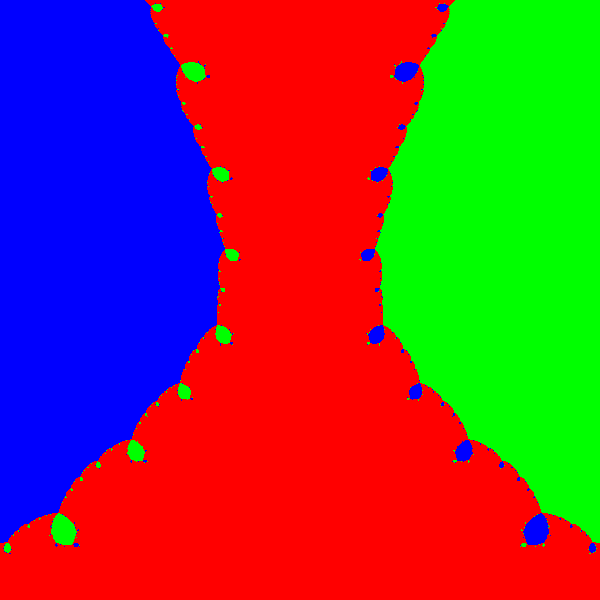

In [74]:
img = Image.fromarray(pixels.astype(np.uint8))
display(img)

### Image of the Basins of Convergence

Here we can visualize the different basins of convergence for our polynomial.
Red represents numbers which converge to $1$. Blue represents numbers which converge to $2i$. Greeen represents the numbers which converge to $-2i$.

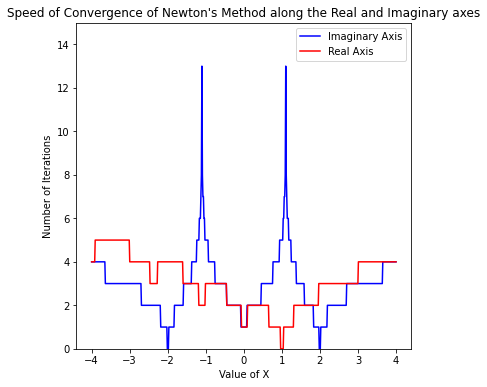

In [94]:
# visualizing the rates of convergence in matplotlib
plt.figure(figsize = (6,6))
x_values = np.linspace(-4,4,600)
conv_reals = np.zeros(600)
conv_reals = stepcount[300,:]
conv_imag = np.zeros(600)
conv_imag = stepcount[:,300]
plt.plot(x_values,conv_reals,label = 'Imaginary Axis', c = 'b')
plt.plot(x_values,conv_imag,label = 'Real Axis', c = 'r')
plt.legend()
plt.title("Speed of Convergence of Newton's Method along the Real and Imaginary axes")
plt.xlabel('Value of X')
plt.ylabel('Number of Iterations')
plt.ylim(0,15)
plt.show()

## Graph of The Rates of Convergence
Here we see the number of iterations it took to be withing $0.2$ of a root of $f(x)$. We look at two slices of the complex plane, along the Real Axis and along the Imaginary Axis. Following these trend lines we see minima at the known values of the roots of $f$; $1$, $2i$, and $-2i$. We also notice areas which the graph spikes in certain poinits, which indicate nearing a starting value which does not converge for Newton's Method.